# Python - Analisando Dados com Python

### Case - Estudantes

Com base nos meus estudos em Ciência de dados estou aplicando conceitos estatísticos em analise de dados para fins de estudos  e aprimoramento na prática, o cenário é um simples de uma escola. Vamos usar Python para entender as medidas são elas:

-> Medida de tendência central:

    a- Média Aritmética
    
    b- Média Ponderada
    
    c- Mediana

-> Medida de dispersão:
    
    a- Amplitude total
    
    b- Desvio Médio
    
    c- Variância 
    
    d- Coeficiente de Variação.    

In [ ]:
# Importar librarys para análise
#!pip install pandas numpy openpyxl nbformat plotly


In [121]:
import pandas as pd

#lendo a base de dados da tabela csv
tabela = pd.read_csv("dados_estudantes.csv")
#dropando dados que não são relevantes ID
tabela = tabela.drop(columns="ID")
#mostra os dados de forma mais bonita e relevante
display(tabela)


,Nome,Notas,Peso
0,Olivia,98,0.2
1,Paul,91,0.3
2,Tina,81,0.2
3,Grace,52,0.5
4,Uma,95,0.3
...,...,...,...
96,Grace,95,0.5
97,Kevin,93,0.4
98,Carol,92,0.4
99,Nathan,76,0.1


In [122]:
#Verificando se tem campos vazios que pode dar diferença na da base de dados
#mostra dados da tabela
display(tabela.info())
#dropna tira os valores vazios Nan
tabela = tabela.dropna()
#tirando dados duplicados
#tabela = tabela.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nome    101 non-null    object 
 1   Notas   101 non-null    int64  
 2   Peso    101 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


None

In [123]:
# Iniciando Análise dos dados
#calcular a media aritmética:
#pega total de notas
qntd_notas=tabela["Notas"].count()
soma_notas=tabela["Notas"].sum()
print("soma de notas= "+str(soma_notas))
print("qntd de notas= "+str(qntd_notas))
#soma das notas / quantidade de notas
media_aritmetica=soma_notas/qntd_notas
print("Média Aritmética= "+str(media_aritmetica))


soma de notas= 7642
qntd de notas= 101
Média Aritmética= 75.66336633663366


In [125]:
#calcular a media pondera:
#pega o total de nota * peso
#percorrendo todo csv com for
#pegando nota e peso

x=0
y=0
for index, row in tabela.iterrows():
    nota = row['Notas']  # Coluna "Notas"
    peso = row['Peso']    # Coluna "Peso"
    
   

    x=x+(nota*peso)
    y=y+peso

   

    # Fazer algo com os valores extraídos
    #print(f"Notas: {nota}, Peso: {peso}")
    #print("Nota ("+str(notas)+") * Peso("+str(peso)+")")



print("Soma Nota* Peso ={:.2f}".format(x))
print("Soma dos pesos= {:.2f}".format(y))
#calculando a media aritmetica
media_ponderada=x/y
print("Média Ponderada= {:.2f}".format(media_ponderada))

Soma Nota* Peso =2362.70
Soma dos pesos= 31.30
Média Ponderada= 75.49


In [126]:
#calcular a mediana:
#percorrendo todo csv com for para achar a mediana
# Calcular a mediana
resultado = tabela['Notas'].median()
contagem_notas = tabela['Notas'].value_counts()
display(contagem_notas)
print(f"Mediana: {resultado:.2f}") 


Notas
95     7
78     7
89     5
79     4
81     4
52     4
51     4
62     4
93     4
68     4
91     3
76     3
59     3
64     3
98     3
71     3
65     3
72     3
55     3
73     2
67     2
96     2
90     2
100    2
74     2
61     2
50     2
82     2
69     1
66     1
60     1
97     1
87     1
63     1
85     1
84     1
92     1
Name: count, dtype: int64

Mediana: 76.00


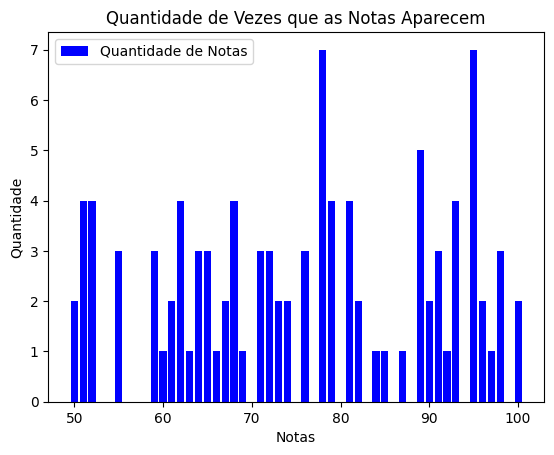

In [127]:
#!pip install matplotlib
#importanto para grafico
import matplotlib.pyplot as plt

#pegando frequencia de cada nota
contagem_notas = tabela['Notas'].value_counts()

for index, row in tabela.iterrows():
    nota = row['Notas']  # Coluna "Notas"
    peso = row['Peso']    # Coluna "Peso"

# pega as notas pelo indice
notas = contagem_notas.index
#pega quantidade  frequencia de casa nota
quantidade = contagem_notas.values

# Criar o gráfico de barras
plt.bar(notas, quantidade, color='blue',label='Quantidade de Notas')

# Adicionar título e rótulos
plt.title('Quantidade de Vezes que as Notas Aparecem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

# Adicionar legenda
plt.legend()
# Mostrar o gráfico
plt.show()


In [128]:
#Calculando a moda
#valor(es) q mais se repete
#pegando frequencia de cada nota
contagem_notas = tabela['Notas'].value_counts()
#pega  nota q mais se repete
#print(contagem_notas.idxmax())
# as vezes  q mais se repete
#print(contagem_notas.max())

#usando loop
# Encontrar a nota que mais se repete usando um loop
max_count = contagem_notas.max()  # Número máximo de ocorrências
nota_mais_frequente = None

# Encontrar as notas que têm a contagem máxima
notas_mais_frequentes = contagem_notas[contagem_notas == max_count]

# Verificar a modalidade
if len(notas_mais_frequentes) == 1:
    # Unimodal
    print(f"A nota que mais se repete é {notas_mais_frequentes.index[0]} e aparece {max_count} vezes.")
elif len(notas_mais_frequentes) > 1:
    # Bimodal ou mais
    notas = ", ".join(map(str, notas_mais_frequentes.index))
    print(f"As notas que mais se repetem são {notas} e aparecem {max_count} vezes.")
else:
    # Amodal
    print("Não há uma nota que se repete mais frequentemente.")

"""for nota, count in contagem_notas.items():
    if count == max_count:
        nota_mais_frequente = nota
        break  # Interrompe o loop após encontrar a primeira ocorrência

print(f"A nota que mais se repete é {nota_mais_frequente} e aparece {max_count} vezes.")"""






As notas que mais se repetem são 95, 78 e aparecem 7 vezes.


'for nota, count in contagem_notas.items():\n    if count == max_count:\n        nota_mais_frequente = nota\n        break  # Interrompe o loop após encontrar a primeira ocorrência\n\nprint(f"A nota que mais se repete é {nota_mais_frequente} e aparece {max_count} vezes.")'